In [111]:
import numpy as np
N = 10
Tasks = 1000
Steps = 3000
epsilon = [0, 0.1, 0.01]

In [115]:
def onerun(qa, Qta, epsilon):
    actionTime = np.ones((3,10))
    avg_reward = np.zeros((3,Steps))
    choose_act = np.zeros((3, Steps))
    for step in range(Steps):
        r = np.random.rand()
        for i, esp in enumerate(epsilon):
            if r > 1 - esp: # randomly choose an action
                idx = np.random.randint(0, N)
            else:
                idx = np.argmax(Qta[i])
            choose_act[i, step] = idx
            reward = np.random.randn() + qa[idx]
            k = actionTime[i, idx]    
            Qta[i, idx] = Qta[i, idx] + (reward - Qta[i, idx]) / k
            actionTime[i, idx] += 1
            avg_reward[i, step] = Qta[i, idx]
    return avg_reward, choose_act


In [96]:
rwd, percents = bandit_test()

In [113]:
%matplotlib inline

#plt.figure(figsize=(30,30))
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def draw(rwd, percents, fname):
    idx = np.arange(Steps)
    figo = plt.figure()

    figo.set_figheight(20)
    figo.set_figwidth(40)

    fig = figo.add_subplot(2,1,1)
    fig.set_xscale('log')
    fig.set_title('Average reward')
    fig.grid()
    g, = fig.plot(idx, rwd[0], label='greedy')
    e1, = fig.plot(idx, rwd[1], label='esp=0.1')
    e2, = fig.plot(idx, rwd[2], label='esp=0.01')
    plt.legend(loc=4, handles=[g,e1,e2])

    fig2 = figo.add_subplot(2,1,2)
    fig2.set_xscale('log')
    fig2.set_title('Optimal Percentage')
    fig2.grid()
    g1, = fig2.plot(idx, percents[0], label='greedy')
    e3, = fig2.plot(idx, percents[1], label='esp=0.1')
    e4, = fig2.plot(idx, percents[2], label='esp=0.01')
    plt.legend(loc=4, handles=[g1,e3,e4])
    plt.show()
    figo.savefig(fname)

In [98]:
# Now implementing Exercise 2.2 Softmax weighted action selection rule.

In [118]:
def bandit_test(runfunc, temps):
    avg_reward = np.zeros((3, Steps))
    best_acts = np.zeros((3, Steps))
    Ztemps = [0, 1, 10]
    for t in range(Tasks):
        qa = np.random.randn(10)
        Qta = np.zeros((3,10))
        one_reward, acts = runfunc(qa, Qta, temps)
        avg_reward += one_reward
        acts[acts != np.argmax(qa)] = 0
        acts[acts == np.argmax(qa)] = 1
        best_acts += acts
    return avg_reward / Tasks, best_acts / Tasks

In [119]:
def softmax_onerun(qa, Qta, temps):
    actionTime = np.ones((3,10))
    avg_reward = np.zeros((3,Steps))
    choose_act = np.zeros((3, Steps))
    for step in range(Steps):
        r = np.random.rand()
        for i, t in enumerate(temps):
            if t == 0:
                idx = np.argmax(Qta[i])
            else:
                denum = np.sum(np.exp(Qta[i]/t))
                weights = np.exp(Qta[i]/t)/denum
                softprob = np.cumsum(weights)
                idx = np.argmax(softprob>r)
            
            choose_act[i, step] = idx
            reward = np.random.randn() + qa[idx]
            k = actionTime[i, idx]    
            Qta[i, idx] = Qta[i, idx] + (reward - Qta[i, idx]) / k
            actionTime[i, idx] += 1
            avg_reward[i, step] = Qta[i, idx]
    return avg_reward, choose_act


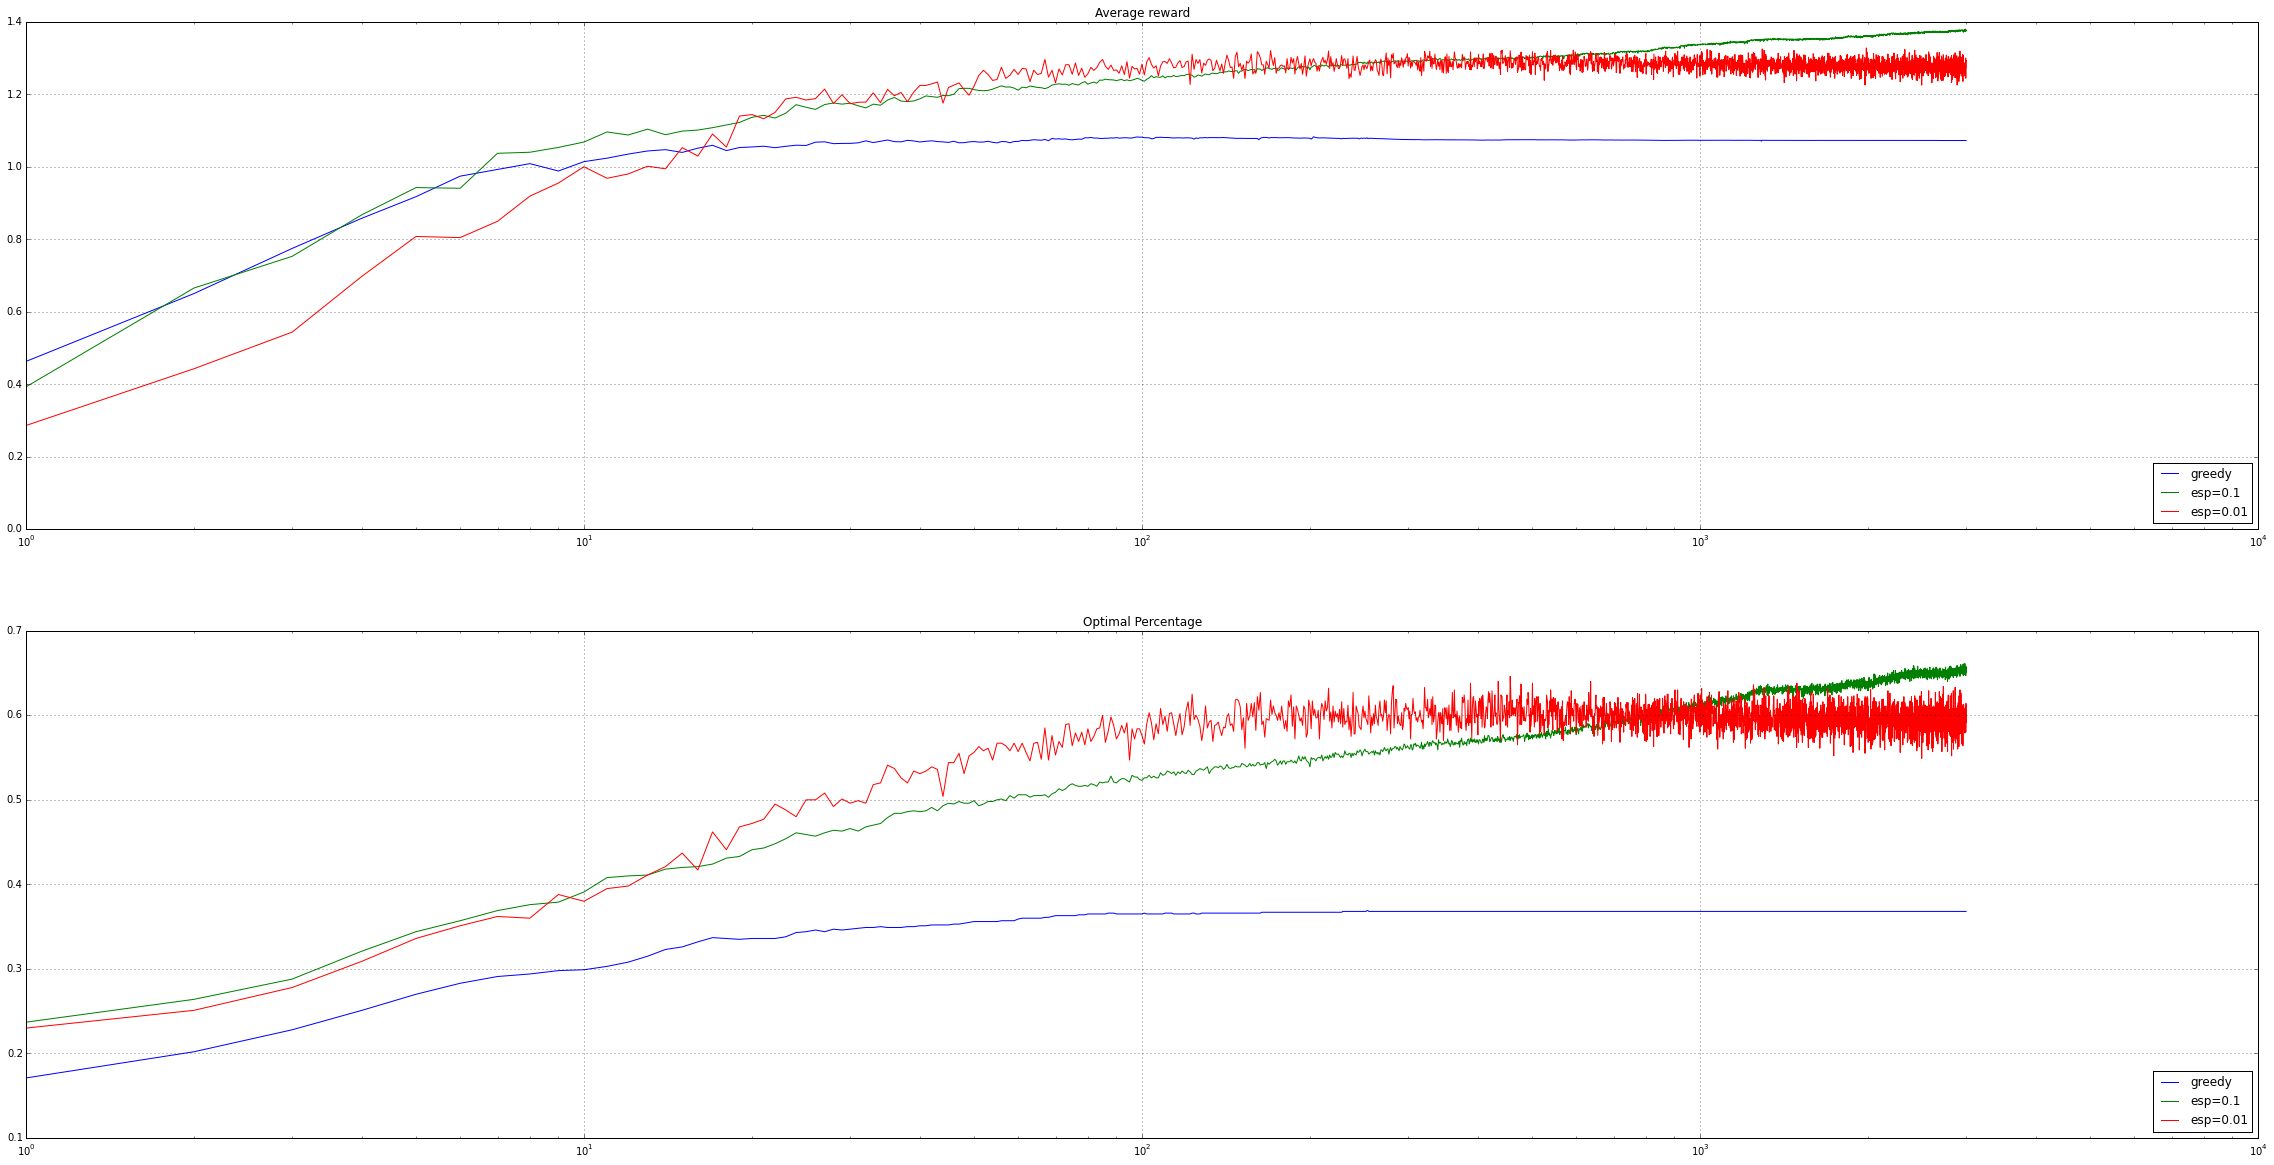

In [110]:
r, p = bandit_test(softmax_onerun, [0, 0.1, 0.5])
draw(r,p, 'softmax.png')

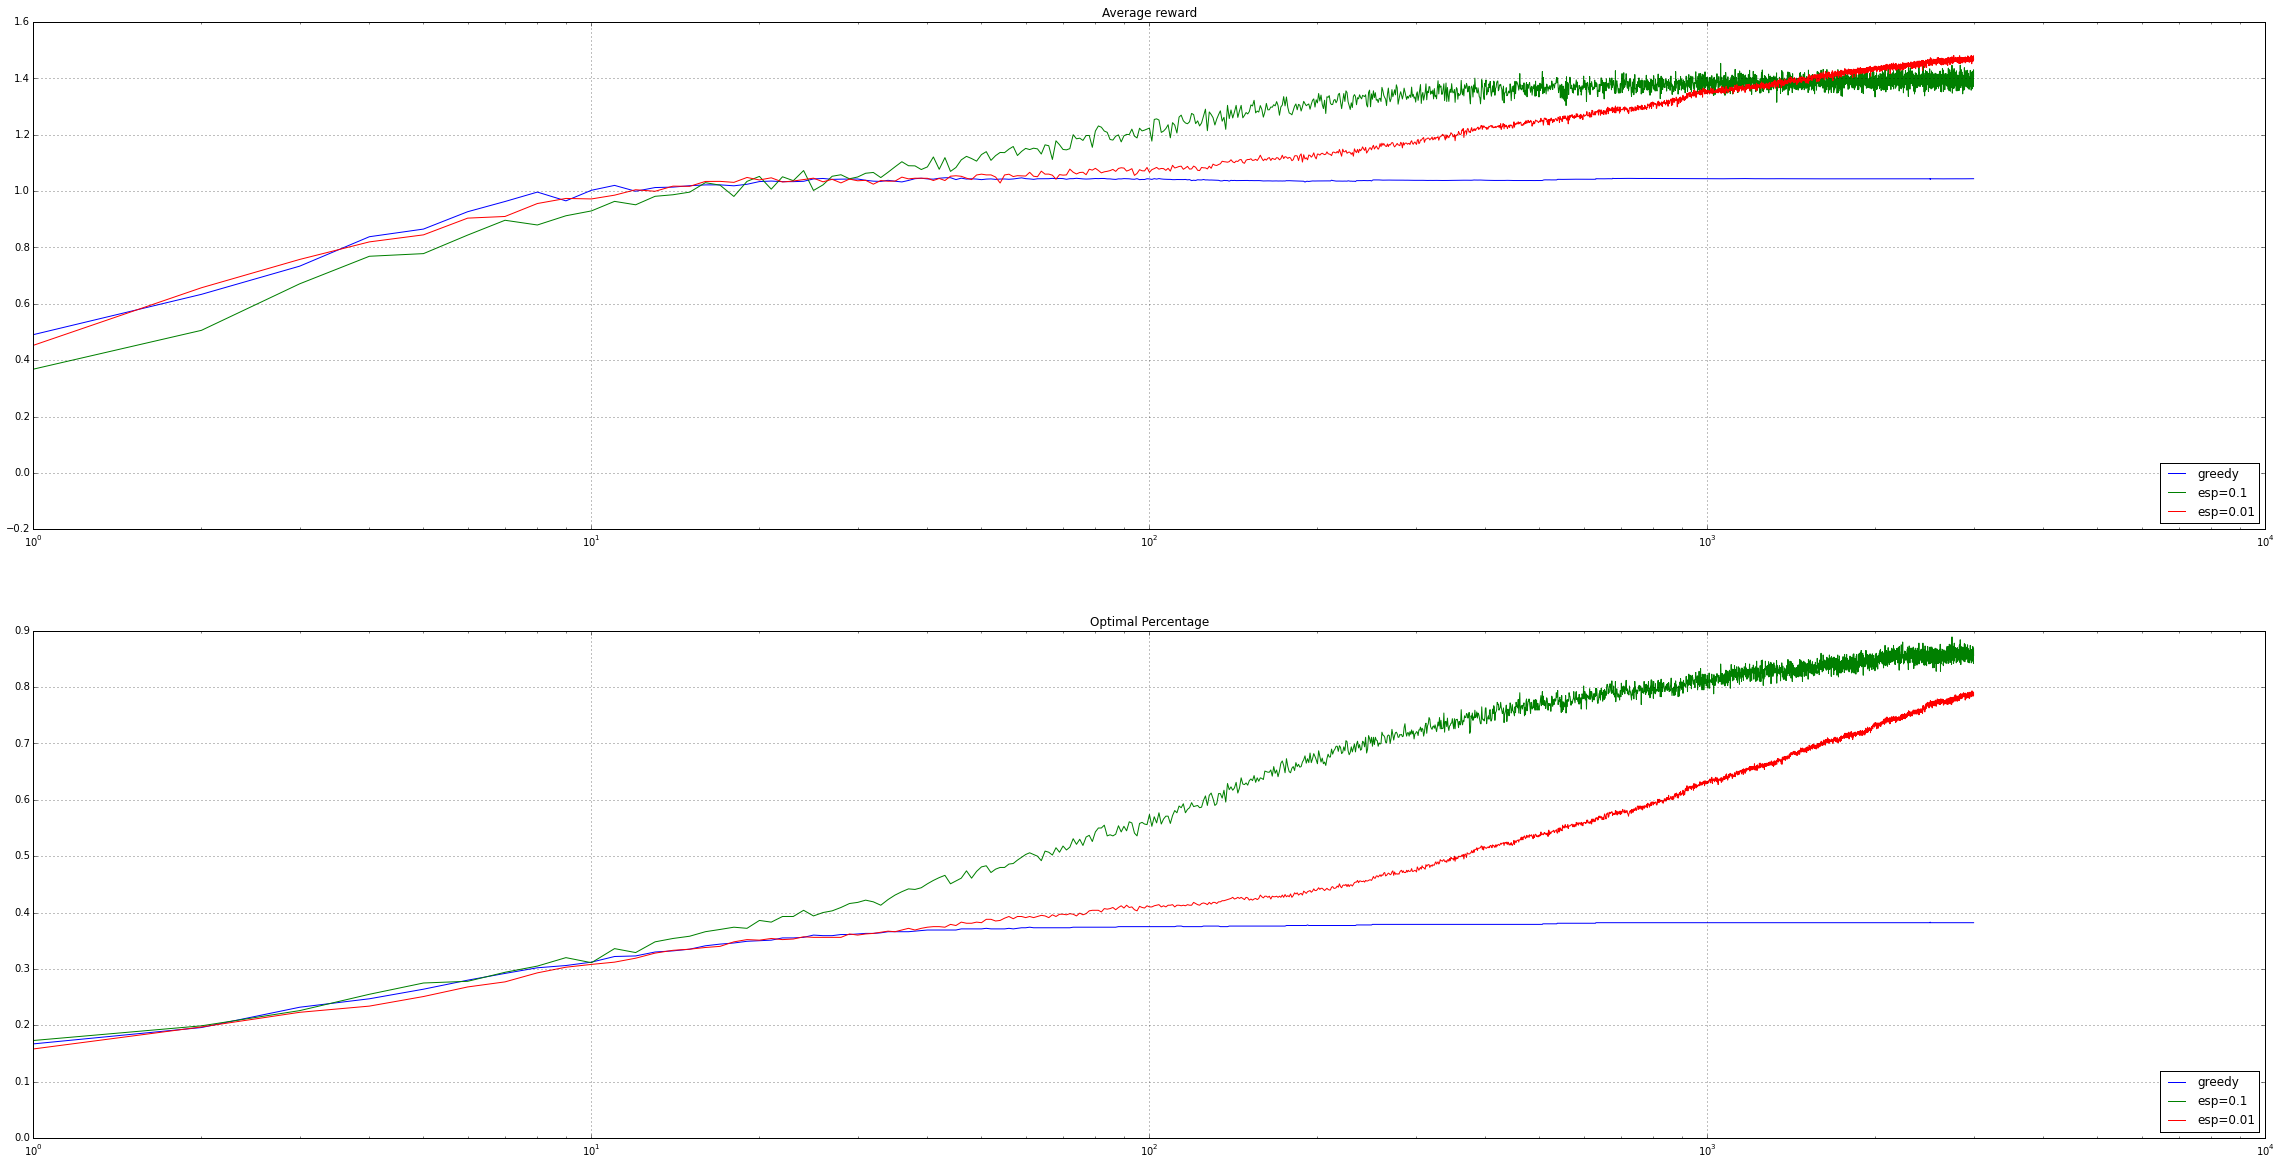

In [120]:
er, ep = bandit_test(onerun, [0, 0.1, 0.01])
draw(er, ep, 'epsilon.png')